## Bank Note Authantication by using ANN

Importing important libraries require for the operation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras 

In [2]:
banknote=pd.read_csv("
                     BankNote_Authentication.csv")

In [3]:
banknote.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
banknote.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
banknote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
banknote.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [7]:
X = banknote.iloc[:, 0:4].values 
X

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [8]:
y= banknote.iloc[:, 4].values 
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

#### spliting the X y into test and train set

In [9]:
!pip install scikit-learn

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=4) 

In [11]:
print("train set"+str((X_train.shape, y_train.shape)))

train set((1097, 4), (1097,))


In [12]:
print(" test set"+ str((X_test.shape,y_test.shape)))

 test set((275, 4), (275,))


 ###### feature scaling the test data 

In [13]:

from sklearn.preprocessing import StandardScaler

In [14]:
st_x= StandardScaler()  

In [15]:
X_train= st_x.fit_transform(X_train) 


In [16]:
X_test= st_x.transform(X_test) 

##### model selection  

In [17]:
#importing keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers  import Dropout

In [18]:
#initializing ANN
classifier= Sequential()
classifier

##### hidden layer and hidden neurons

In [19]:

classifier.add(Dense(units =8, kernel_initializer = 'he_uniform' , activation = 'relu', input_dim =4 ))

In [20]:
classifier.add(Dense(units=1 , kernel_initializer= 'glorot_uniform' , activation = 'sigmoid'))

In [21]:
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_epoch=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10,epochs = 300)

Epoch 1/300
74/74 [==============================] - 14s 9ms/step - loss: 0.6216 - accuracy: 0.6852 - val_loss: 0.5057 - val_accuracy: 0.8430
Epoch 2/300
74/74 [==============================] - 0s 1ms/step - loss: 0.4930 - accuracy: 0.8606 - val_loss: 0.4057 - val_accuracy: 0.9256
Epoch 3/300
74/74 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.9039 - val_loss: 0.3333 - val_accuracy: 0.9587
Epoch 4/300
74/74 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.9700 - val_loss: 0.2797 - val_accuracy: 0.9614
Epoch 5/300
74/74 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.9487 - val_loss: 0.2376 - val_accuracy: 0.9614
Epoch 6/300
74/74 [==============================] - 0s 1ms/step - loss: 0.2410 - accuracy: 0.9656 - val_loss: 0.2040 - val_accuracy: 0.9669
Epoch 7/300
74/74 [==============================] - 0s 1ms/step - loss: 0.2031 - accuracy: 0.9715 - val_loss: 0.1768 - val_accuracy: 0.9697
Epoch 8/300


Epoch 59/300
74/74 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9956 - val_loss: 0.0198 - val_accuracy: 0.9945
Epoch 60/300
74/74 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9908 - val_loss: 0.0193 - val_accuracy: 0.9945
Epoch 61/300
74/74 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9996 - val_loss: 0.0191 - val_accuracy: 0.9945
Epoch 62/300
74/74 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9953 - val_loss: 0.0187 - val_accuracy: 0.9945
Epoch 63/300
74/74 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9994 - val_loss: 0.0182 - val_accuracy: 0.9945
Epoch 64/300
74/74 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9983 - val_loss: 0.0180 - val_accuracy: 0.9945
Epoch 65/300
74/74 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9992 - val_loss: 0.0173 - val_accuracy: 0.9945
Epoch 

74/74 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 117/300
74/74 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 118/300
74/74 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 119/300
74/74 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 120/300
74/74 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 121/300
74/74 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 122/300
74/74 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 123/300

74/74 [==============================] - 0s 2ms/step - loss: 5.0159e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 173/300
74/74 [==============================] - 0s 2ms/step - loss: 2.9027e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 174/300
74/74 [==============================] - 0s 2ms/step - loss: 6.2266e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 175/300
74/74 [==============================] - 0s 2ms/step - loss: 2.6250e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 176/300
74/74 [==============================] - 0s 2ms/step - loss: 5.2211e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 177/300
74/74 [==============================] - 0s 2ms/step - loss: 3.6746e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 178/300
74/74 [==============================] - 0s 2ms/step - loss: 5.1158e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_ac

Epoch 227/300
74/74 [==============================] - 0s 1ms/step - loss: 9.6458e-05 - accuracy: 1.0000 - val_loss: 5.7318e-04 - val_accuracy: 1.0000
Epoch 228/300
74/74 [==============================] - 0s 2ms/step - loss: 9.8257e-05 - accuracy: 1.0000 - val_loss: 5.3962e-04 - val_accuracy: 1.0000
Epoch 229/300
74/74 [==============================] - 0s 1ms/step - loss: 2.2410e-04 - accuracy: 1.0000 - val_loss: 5.1603e-04 - val_accuracy: 1.0000
Epoch 230/300
74/74 [==============================] - 0s 1ms/step - loss: 6.8972e-05 - accuracy: 1.0000 - val_loss: 5.0732e-04 - val_accuracy: 1.0000
Epoch 231/300
74/74 [==============================] - 0s 2ms/step - loss: 1.1829e-04 - accuracy: 1.0000 - val_loss: 5.2921e-04 - val_accuracy: 1.0000
Epoch 232/300
74/74 [==============================] - 0s 2ms/step - loss: 8.6374e-05 - accuracy: 1.0000 - val_loss: 5.1090e-04 - val_accuracy: 1.0000
Epoch 233/300
74/74 [==============================] - 0s 2ms/step - loss: 6.6510e-05 - accura

74/74 [==============================] - 0s 1ms/step - loss: 2.5980e-05 - accuracy: 1.0000 - val_loss: 3.3958e-04 - val_accuracy: 1.0000
Epoch 282/300
74/74 [==============================] - 0s 1ms/step - loss: 3.2222e-05 - accuracy: 1.0000 - val_loss: 3.2087e-04 - val_accuracy: 1.0000
Epoch 283/300
74/74 [==============================] - 0s 2ms/step - loss: 3.3218e-05 - accuracy: 1.0000 - val_loss: 3.2977e-04 - val_accuracy: 1.0000
Epoch 284/300
74/74 [==============================] - 0s 1ms/step - loss: 5.1311e-05 - accuracy: 1.0000 - val_loss: 2.9943e-04 - val_accuracy: 1.0000
Epoch 285/300
74/74 [==============================] - 0s 1ms/step - loss: 3.1290e-05 - accuracy: 1.0000 - val_loss: 2.9662e-04 - val_accuracy: 1.0000
Epoch 286/300
74/74 [==============================] - 0s 1ms/step - loss: 2.1748e-05 - accuracy: 1.0000 - val_loss: 2.9901e-04 - val_accuracy: 1.0000
Epoch 287/300
74/74 [==============================] - 0s 2ms/step - loss: 1.4681e-05 - accuracy: 1.0000 - v

In [24]:
model_epoch.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
y_pred=classifier.predict(X_test)

In [26]:
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[158,   0],
       [  0, 117]], dtype=int64)

In [28]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

1.0

In [29]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [30]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


#### ploting graph loss vs epoch

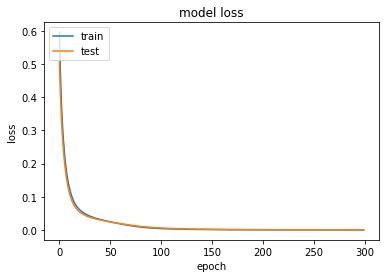

In [31]:
plt.plot(model_epoch.history['loss'])
plt.plot(model_epoch.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Ploting accuracy verses epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


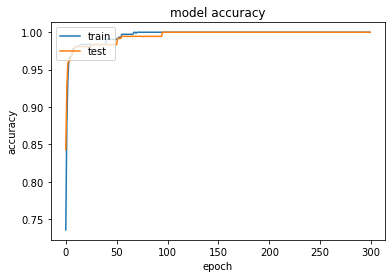

In [32]:
# list all data in history
print(model_epoch.history.keys())
# summarize history for accuracy
plt.plot(model_epoch.history['accuracy'])
plt.plot(model_epoch.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()